In [3]:
%matplotlib inline
from IPython.display import display

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import ConnectionPatch
from datetime import datetime, timedelta

In [5]:
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Segoe UI'

In [6]:
def get_month(month):
    if type(month) is not int:
        month = int(month)
    match month:
        case 1:
            return 'Januar'
        case 2:
            return 'Februar'
        case 3:
            return 'März'
        case 4:
            return 'April'
        case 5:
            return 'Mai'
        case 6: 
            return 'Juni'
        case 7:
            return 'Juli'
        case 8:
            return 'August'
        case 9:
            return 'Septemper'
        case 10:
            return 'Oktober'
        case 11:
            return 'Novemeber'
        case 12:
            return 'Dezember'
        case _:
            return 'Invalid!'

### Load data

In [7]:
# Pie with bar --> need monthly overview of each year
# Line plot --> need average over each year
# Boxplot --> need daily data
# Spiderplot --> ???

months = list(range(1,13))

print(months)

base = 'generation'
years = os.listdir(base)
years.remove(str(datetime.today().year))

print(years)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['2017', '2018', '2019', '2020', '2021']


In [8]:
data = {y: {m: None for m in months} for y in years}
print(data)

{'2017': {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None}, '2018': {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None}, '2019': {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None}, '2020': {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None}, '2021': {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None}}


In [9]:
for y in years:
    for i, f in enumerate(os.listdir(os.path.join(base, y))):
        data[y][i+1] = pd.read_csv(os.path.join(base,y,f))
        data[y][i+1].insert(len(data[y][i+1].columns), 'Rest', data[y][i+1]['TotalLoadValue'] - data[y][i+1]['Nuclear'] - data[y][i+1]['FlowValue'])

print(data)

{'2017': {1:             Date   Time  TotalLoadValue  FlowValue  Wind Onshore  Solar  \
0    2017-01-01   00:00         6750.32    3256.37          2.88   0.19   
1    2017-01-01   01:00         7110.97    3692.22          2.99   0.19   
2    2017-01-01   02:00         7188.56    3699.11          2.62   0.19   
3    2017-01-01   03:00         7104.77    3618.31          2.60   0.19   
4    2017-01-01   04:00         6883.08    3572.79          3.34   0.19   
..           ...    ...             ...        ...           ...    ...   
739  2017-01-31   19:00         8520.68     886.11         16.41   0.17   
740  2017-01-31   20:00         7997.71    2676.74         15.96   0.17   
741  2017-01-31   21:00         7552.26    3934.96         15.93   0.17   
742  2017-01-31   22:00         7379.88    3901.70         16.38   0.17   
743  2017-01-31   23:00         7378.73    4387.56         16.26   0.12   

     Hydro Pumped Storage  Hydro Water Reservoir  \
0                  149.05         

### Pie chart with bar

In [10]:
monthly_avg = {m: None for m in months}
for m in months:
    month_data = []
    for y in years:
        month_data.append(data[y][m])
    month_data = pd.concat(month_data, axis=0)
    monthly_avg[m] = month_data.mean(axis=0, numeric_only=True)
    if monthly_avg[m]['FlowValue'] < 0:
        monthly_avg[m]['FlowValue'] = 0

print(monthly_avg[1])

TotalLoadValue                     8121.761852
FlowValue                          1302.681011
Wind Onshore                         14.864844
Solar                                32.681960
Hydro Pumped Storage                819.638435
Hydro Water Reservoir              1530.045452
Hydro Run-of-river and poundage     125.999288
Nuclear                            2740.444328
KKM Produktion                      222.723253
Beznau 2                            363.459516
Beznau 1                            217.403548
Leibstadt                           946.324731
Kernkraftwerk Gösgen                990.533280
Rest                               4078.636513
dtype: float64


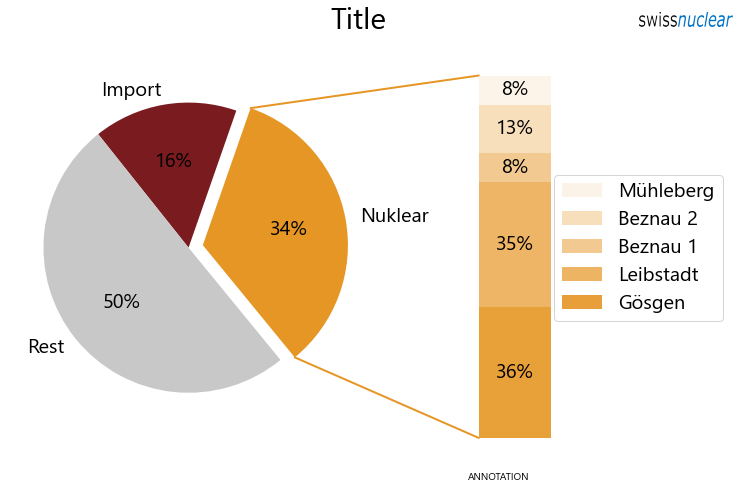

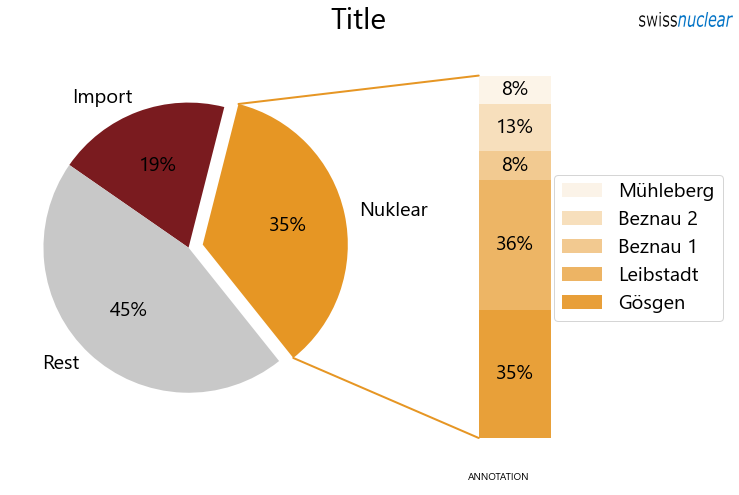

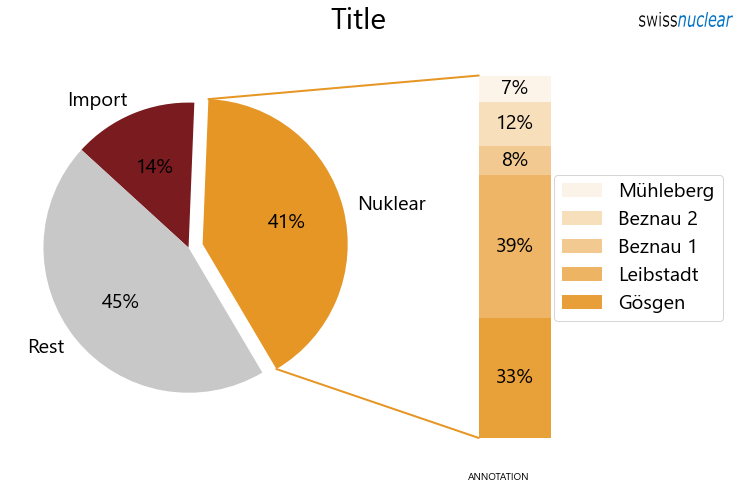

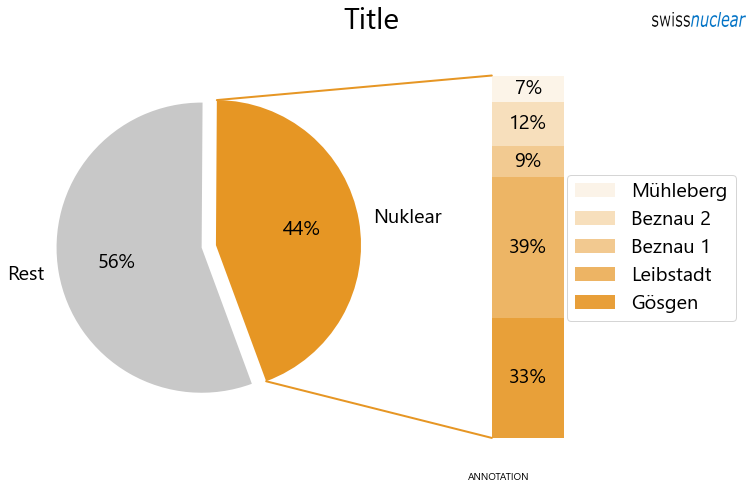

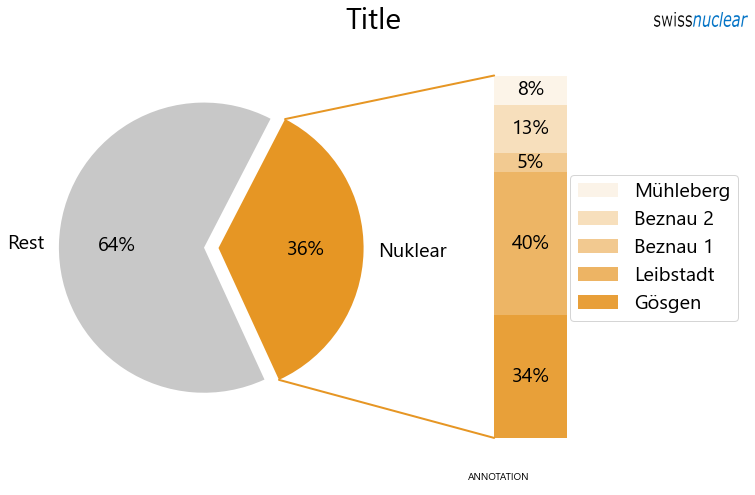

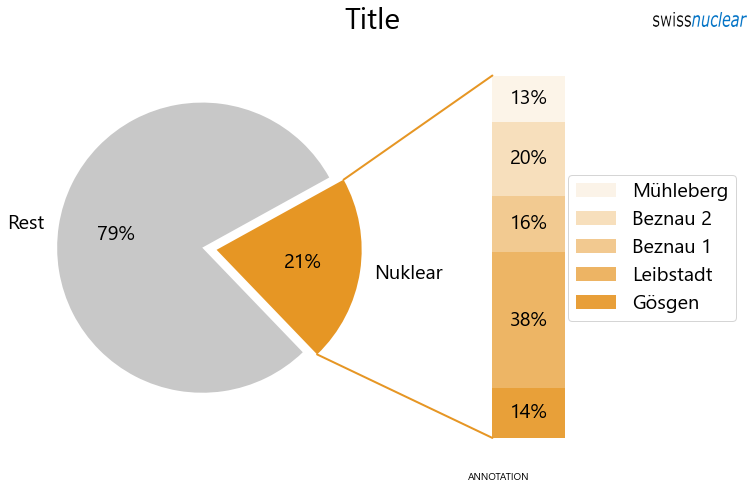

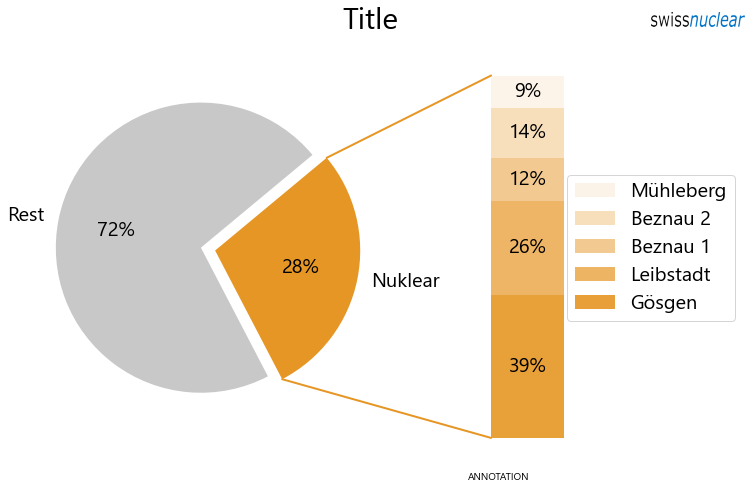

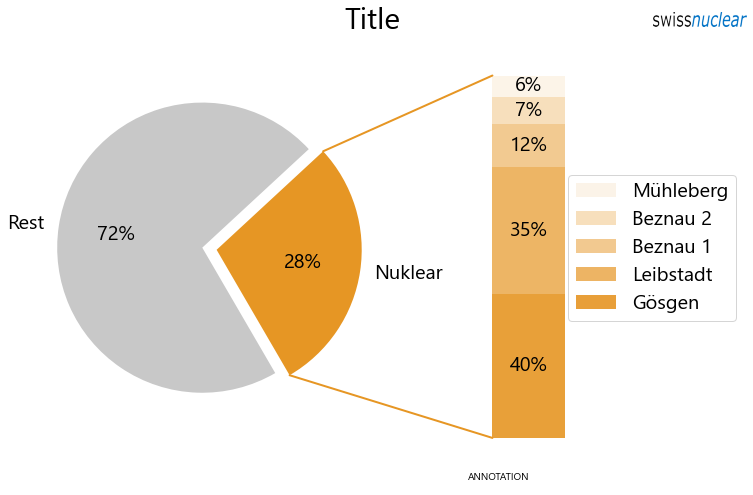

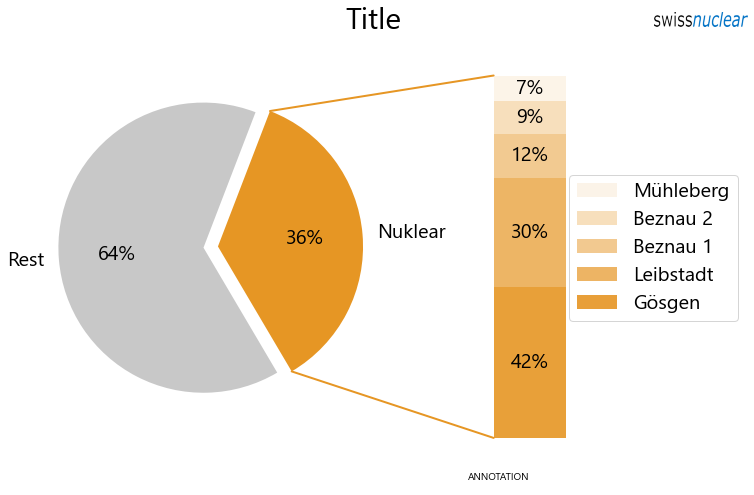

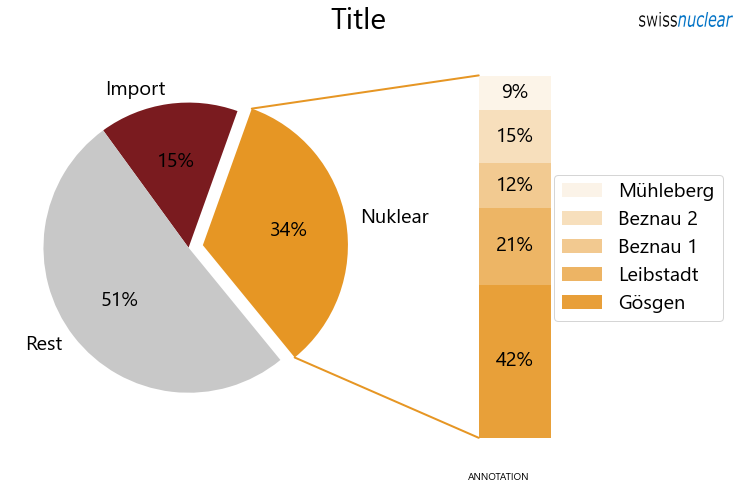

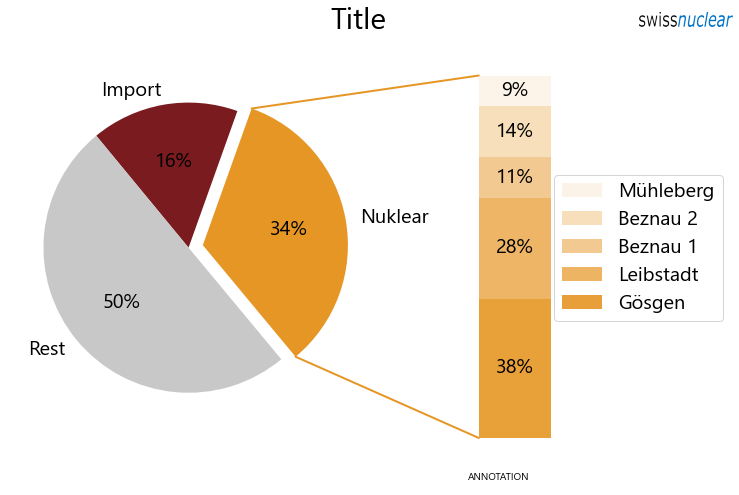

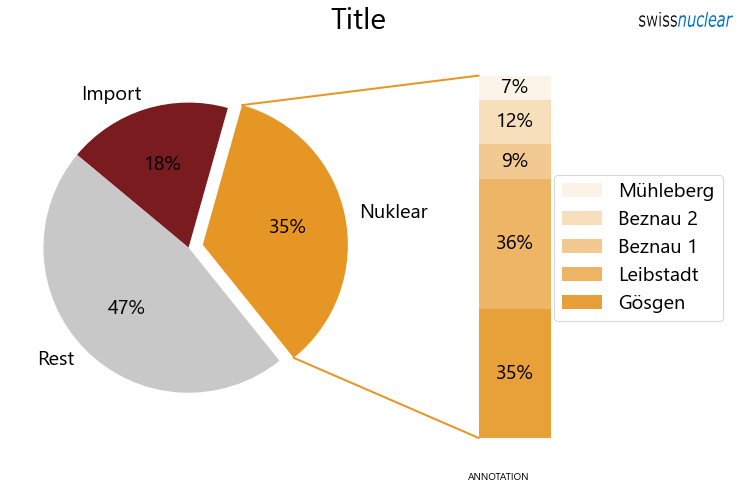

In [11]:
for m, v in monthly_avg.items():
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,7))
    fig.subplots_adjust(wspace=0)
    fig.suptitle('Title', fontsize=30)

    # pie chart
    if v['FlowValue'] == 0:
        pie_ratios = [v['Nuclear'], v['Rest']] / (v['TotalLoadValue']+v['Nuclear'])
        pie_labels = [f'Nuklear', f'Rest']
        explode = [0.1, 0]
        angle = -225*pie_ratios[0]
        wedges, *_ = ax1.pie(pie_ratios,  autopct='%1.0f%%', startangle=angle, labels=pie_labels, explode=explode, colors=['#e69624', '#C8C8C8'])
    else:
        pie_ratios = [v['Nuclear'], v['FlowValue'], v['Rest']] / (v['TotalLoadValue']+v['FlowValue']+v['Nuclear'])
        pie_labels = [f'Nuklear', f'Import', f'Rest']
        explode = [0.1, 0, 0]
        angle = -225*pie_ratios[0]
        wedges, *_ = ax1.pie(pie_ratios, autopct='%1.0f%%', startangle=angle, labels=pie_labels, explode=explode, colors=['#e69624', '#7a1b1f', '#C8C8C8'])
    # ax1.set_title(get_month(m))

    # bar chart
    bar_ratios = [v['Kernkraftwerk Gösgen'], v['Leibstadt'], v['Beznau 1'], v['Beznau 2'], v['KKM Produktion']] / v['Nuclear']
    bar_labels = ['Gösgen', 'Leibstadt', 'Beznau 1', 'Beznau 2', 'Mühleberg']
    bottom, width = 1, 0.1
    for j, (height, label) in enumerate(reversed([*zip(bar_ratios, bar_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color='#e69624', label=label, alpha=0.1+0.2*j)
        ax2.bar_label(bc, labels=[f'{height:.0%}'], label_type='center')

    # ax2.set_title('Nach Kernkraftwerk')
    ax2.legend(loc=7)
    ax2.axis('off')
    ax2.set_xlim(- 2 * width, 3 * width)

    theta1, theta2 = wedges[0].theta1, wedges[0].theta2
    center, r = wedges[0].center, wedges[0].r
    bar_height = sum(bar_ratios)
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
    con.set_color('#e69624')
    con.set_linewidth(2)
    ax2.add_artist(con)
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
    con.set_color('#e69624')
    ax2.add_artist(con)
    con.set_linewidth(2)

    plt.annotate('ANNOTATION', xycoords='figure fraction', xy=(0.50,0.03), fontsize=10)

    logo = plt.imread('swissnuclear logo.png')
    imgax = fig.add_axes([0.8, 0.94, 0.1, 0.1], anchor='SE')
    imgax.imshow(logo)
    imgax.axis('off')

    plt.show()

    



### Line plot

In [12]:
yearly_avg = {y: None for y in years}
for y in years:
    year_data = pd.concat([data[y][m] for m in months], axis=0)
    yearly_avg[y] = year_data.mean(axis=0, numeric_only=True)
print(yearly_avg)


{'2017': TotalLoadValue                     6979.834613
FlowValue                           730.817678
Wind Onshore                          9.042347
Solar                                48.144382
Hydro Pumped Storage                753.416541
Hydro Water Reservoir              1011.515054
Hydro Run-of-river and poundage      78.428958
Nuclear                            2240.147808
KKM Produktion                      341.618094
Beznau 2                            307.983356
Beznau 1                              0.006107
Leibstadt                           679.576256
Kernkraftwerk Gösgen                910.707820
Rest                               4008.869127
dtype: float64, '2018': TotalLoadValue                     6896.816667
FlowValue                           113.834661
Wind Onshore                          6.568687
Solar                                40.280572
Hydro Pumped Storage                786.042463
Hydro Water Reservoir              1174.746193
Hydro Run-of-river and poun

(-0.5, 347.5, 55.5, -0.5)

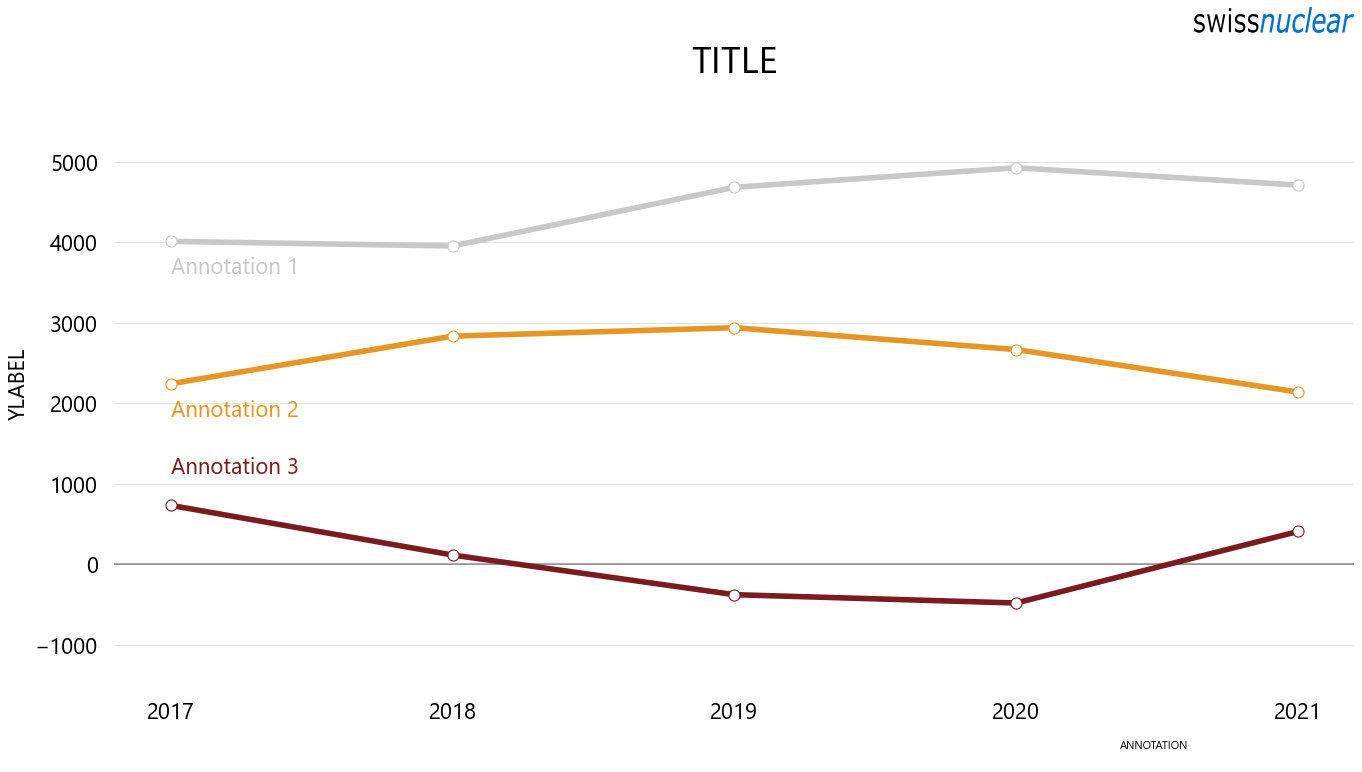

In [36]:
years_idx = [i for i, _ in enumerate(years)]
y_nuc = [yearly_avg[y]['Nuclear'] for y in years]
y_flow = [yearly_avg[y]['FlowValue'] for y in years]
y_rest = [yearly_avg[y]['Rest'] for y in years]

fig = plt.figure(figsize=(20,10), dpi=80)
ax = plt.gca()

ax.hlines(0, -0.5, max(years_idx)+0.5, color='k', alpha=0.4)
plt.plot(years_idx, y_nuc, '#e69624', lw=5, zorder=10)
plt.plot(years_idx, y_flow,'#7a1b1f', lw=5, zorder=10)
plt.plot(years_idx, y_rest,'#C8C8C8', lw=5, zorder=10)
plt.scatter(years_idx, y_nuc,  c='white', edgecolors='#e69624', s=100, zorder=20)
plt.scatter(years_idx, y_flow, c='white', edgecolors='#7a1b1f', s=100, zorder=20)
plt.scatter(years_idx, y_rest, c='white', edgecolors='#C8C8C8', s=100, zorder=20)

plt.title('TITLE', fontsize=34)

plt.xlim(-0.2, max(years_idx)+0.2)
plt.xticks(years_idx,years)

plt.yticks(range(-2000, 6000, 1000))
plt.ylim(-1500, 6000)
plt.ylabel('YLABEL')

plt.grid(axis='y', alpha=0.4, zorder=0)
plt.box(on=False)
ax.tick_params(axis='y', length=0, pad=15)
ax.tick_params(axis='x', direction='in', length=0, color='dimgrey', pad=15)

plt.annotate('Annotation 1', (years_idx[0], y_rest[0]-400), color='#C8C8C8')
plt.annotate('Annotation 2', (years_idx[0], y_nuc[0]-400), color='#e69624')
plt.annotate('Annotation 3', (years_idx[0], y_flow[0]+400), color='#7a1b1f')

plt.annotate('ANNOTATION', xycoords='figure fraction', xy=(0.70,0.03), fontsize=10)

logo = plt.imread('swissnuclear logo.png')
imgax = fig.add_axes([0.8, 0.94, 0.1, 0.1], anchor='SE')
imgax.imshow(logo)
imgax.axis('off')

### Boxplot

In [14]:
total_data = []
for y in years:
    for m in months:
        total_data.append(data[y][m])

total_data = pd.concat(total_data, axis=0)
print(total_data)

            Date   Time  TotalLoadValue  FlowValue  Wind Onshore  Solar  \
0    2017-01-01   00:00         6750.32    3256.37          2.88   0.19   
1    2017-01-01   01:00         7110.97    3692.22          2.99   0.19   
2    2017-01-01   02:00         7188.56    3699.11          2.62   0.19   
3    2017-01-01   03:00         7104.77    3618.31          2.60   0.19   
4    2017-01-01   04:00         6883.08    3572.79          3.34   0.19   
..           ...    ...             ...        ...           ...    ...   
739  2021-12-31   19:00         7212.98     462.40         43.11   0.00   
740  2021-12-31   20:00         6865.22     587.00         37.08   0.00   
741  2021-12-31   21:00         6602.45    1110.72         36.13   0.00   
742  2021-12-31   22:00         7018.81    2178.11         39.70   0.00   
743  2021-12-31   23:00         7272.21    2037.07         27.94   0.00   

     Hydro Pumped Storage  Hydro Water Reservoir  \
0                  149.05                1018.5

(-0.5, 347.5, 55.5, -0.5)

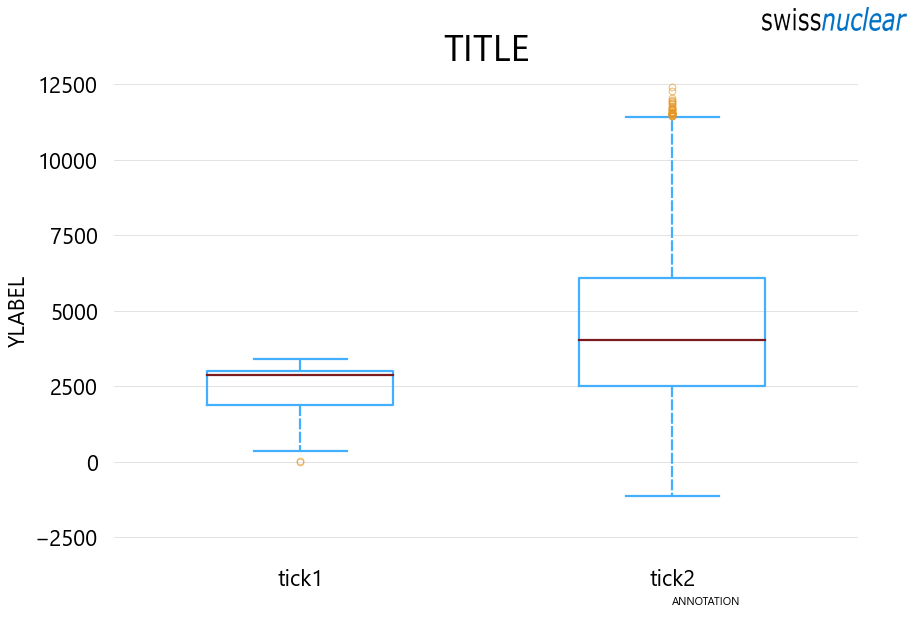

In [38]:
fig = plt.figure(figsize=(12,8), dpi=80)
ax = plt.gca()

bp = total_data.boxplot(column=['Nuclear','Rest'], widths=0.5, boxprops={'color':'#44AFFF', 'linewidth':2}, \
    whiskerprops={'color':'#44AFFF', 'linewidth':2, 'linestyle':(0, (5, 1))}, capprops={'color':'#44AFFF', 'linewidth':2}, \
    flierprops={'markeredgecolor':'#e69624', 'alpha':0.6}, medianprops={'color':'#7a1b1f', 'lw':2})

plt.title('TITLE', fontsize=34)

plt.xticks([1, 2], ['tick1', 'tick2'])

plt.ylabel('YLABEL')
plt.ylim([-3000,13000])
plt.yticks(range(-2500,13000,2500))

plt.grid(axis='y', alpha=0.4, zorder=0)
plt.grid(axis='x', visible=False)
plt.box(on=False)
ax.tick_params(axis='y', length=0, pad=15)
ax.tick_params(axis='x', direction='in', length=0, color='dimgrey', pad=15)

plt.annotate('ANNOTATION', xycoords='figure fraction', xy=(0.70,0.03), fontsize=10)

logo = plt.imread('swissnuclear logo.png')
imgax = fig.add_axes([0.8, 0.94, 0.15, 0.15], anchor='SE')
imgax.imshow(logo)
imgax.axis('off')